<a href="https://colab.research.google.com/github/pchavanp/CNN-MODEL/blob/main/cats_and_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
 96% 62.0M/64.4M [00:00<00:00, 101MB/s]
100% 64.4M/64.4M [00:00<00:00, 99.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-and-dogs-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/cats-and-dogs-image-classification.zip' mode='r'>>

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [15]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [16]:
# normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
Validation_ds = Validation_ds.map(process)

In [20]:
# create CNN model

model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history=model.fit(train_ds, epochs=10, validation_data=Validation_ds)

Epoch 1/10
18/18 [==============================] - 7s 139ms/step - loss: 5.7307 - accuracy: 0.5332 - val_loss: 5.0599 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 4s 147ms/step - loss: 5.3016 - accuracy: 0.5978 - val_loss: 3.7100 - val_accuracy: 0.4786
Epoch 3/10
18/18 [==============================] - 4s 167ms/step - loss: 3.0539 - accuracy: 0.6966 - val_loss: 14.8954 - val_accuracy: 0.5000
Epoch 4/10
18/18 [==============================] - 4s 151ms/step - loss: 2.7806 - accuracy: 0.6804 - val_loss: 12.5911 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 4s 150ms/step - loss: 1.7654 - accuracy: 0.7002 - val_loss: 14.5475 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 4s 153ms/step - loss: 1.8991 - accuracy: 0.7056 - val_loss: 7.3376 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 5s 191ms/step - loss: 1.3890 - accuracy: 0.7558 - val_loss: 5.5965 - val_accuracy: 0.5000
Epo

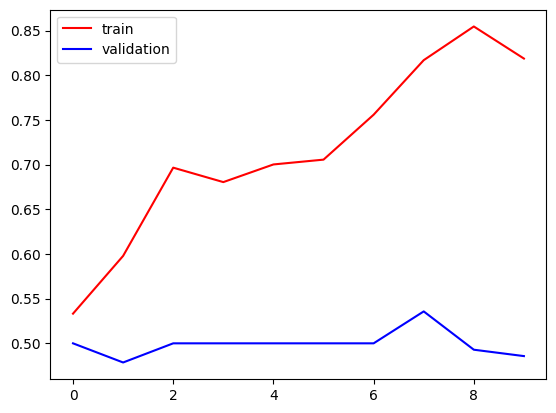

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

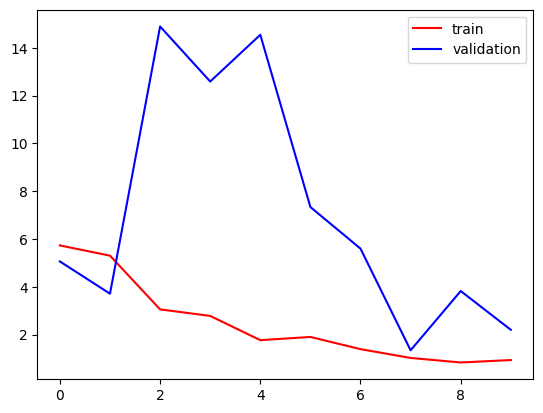

In [26]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to overfitting reduce